In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

import warnings

pd.set_option('max.columns',None)
warnings.filterwarnings("ignore")
sns.set()

In [2]:
data = pd.read_csv('Predicting-House-Prices-In-Bengaluru-Train-Data.csv')
print(data.shape)
data.head()

(13320, 9)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## Data Visualization

In [3]:
data['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

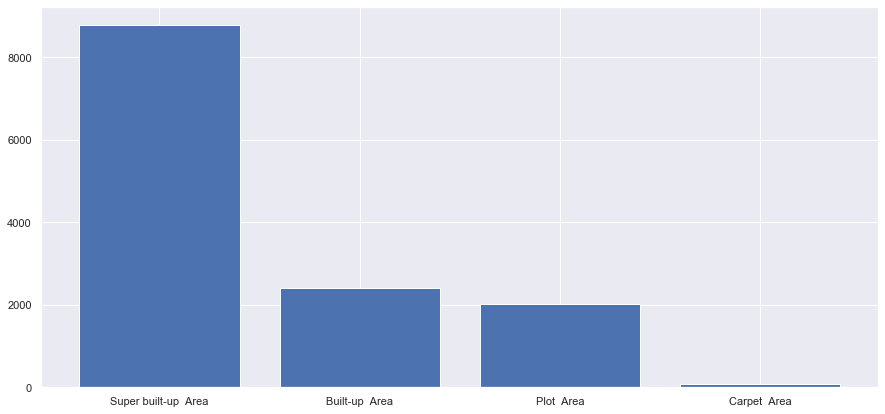

In [4]:
plt.figure(figsize=(15,7))
plt.bar(data['area_type'].value_counts().index,data['area_type'].value_counts().values)
plt.show()

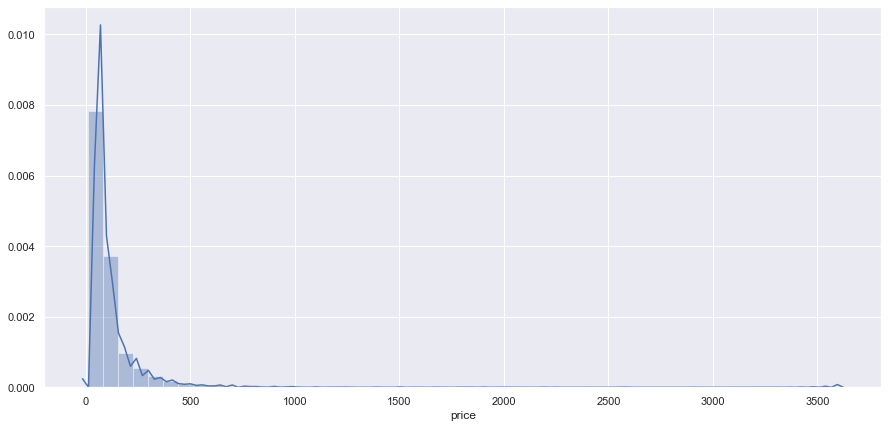

In [5]:
plt.figure(figsize=(15,7))
sns.distplot(data['price'])
plt.show()

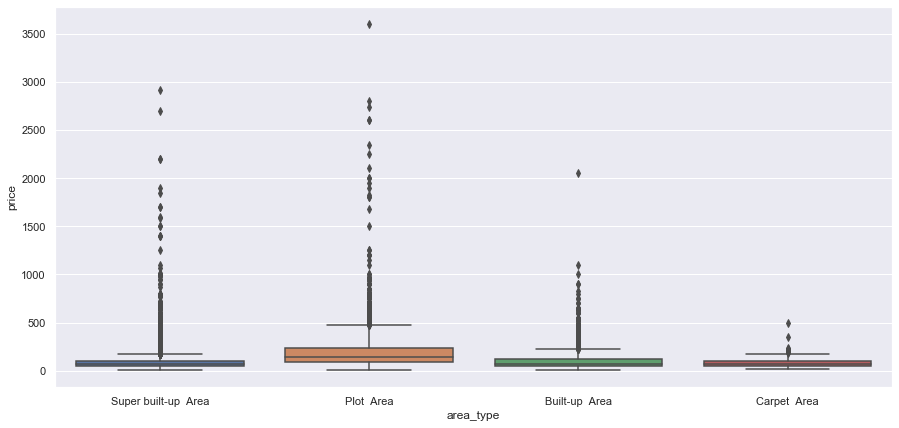

In [6]:
plt.figure(figsize=(15,7))
sns.boxplot(data=data,x=data['area_type'],y=data['price'])
plt.show()

In [7]:
data['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [8]:
sub_data = data[data['area_type'] == 'Plot  Area']
sub_data.shape

(2025, 9)

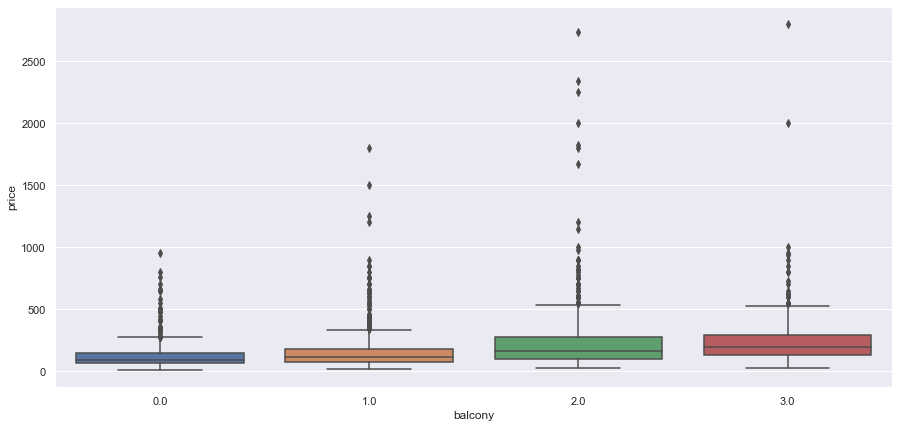

In [9]:
plt.figure(figsize=(15,7))
sns.boxplot(data=sub_data,x=sub_data['balcony'],y=sub_data['price'])
plt.show()

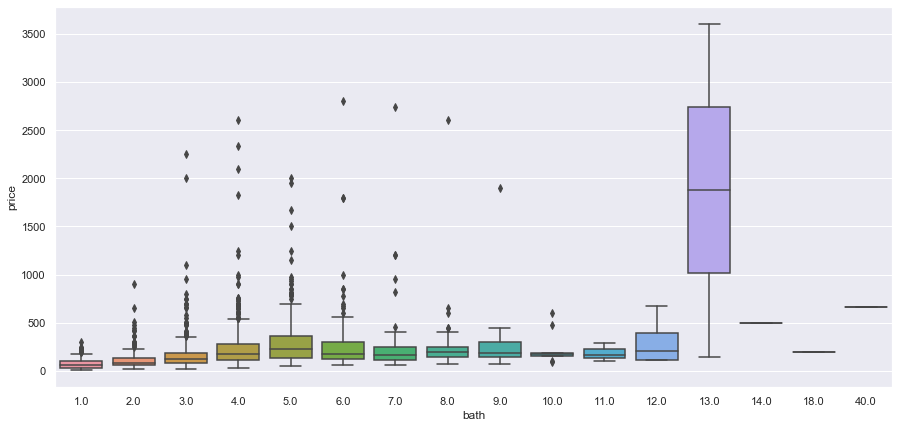

In [10]:
plt.figure(figsize=(15,7))
sns.boxplot(data=sub_data,x=sub_data['bath'],y=sub_data['price'])
plt.show()

## Handling Missing values

In [11]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

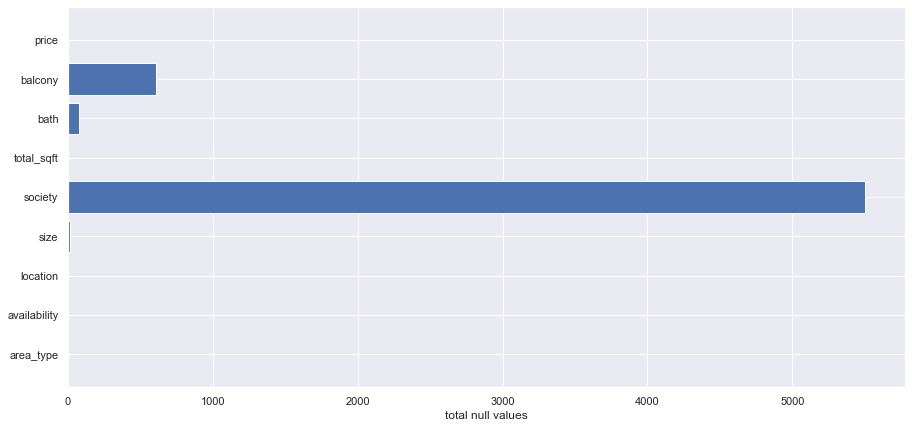

In [12]:
plt.figure(figsize=(15,7))
plt.barh(data.isnull().sum().index,width=data.isnull().sum().values)
plt.xlabel('total null values')
plt.show()

In [13]:
data['balcony'].unique()

array([ 1.,  3., nan,  2.,  0.])

In [14]:
data['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

In [15]:
data['society'].unique()

array(['Coomee ', 'Theanmp', nan, ..., 'SJovest', 'ThhtsV ', 'RSntsAp'],
      dtype=object)

In [16]:
data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [17]:
data['balcony'].replace({0.0:1,1.0:2,2.0:3,3.0:4},inplace=True)
data['balcony'].unique()

array([ 2.,  4., nan,  3.,  1.])

In [18]:
data.fillna(0,inplace=True)
data.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

## Handling categorical values

In [19]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,2.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,4.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,0,1440,2.0,4.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,2.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,0,1200,2.0,2.0,51.00


In [20]:
cat_columns = ['area_type','availability','location','size','society','bath','balcony']

for col in data.columns:
    if col in cat_columns:
        data[col] = data[col].astype('category')
        data[col] = data[col].cat.codes


In [21]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,3,40,420,14,465,1056,2,2,39.07
1,2,80,318,20,2440,2600,5,4,120.00
2,0,80,1180,17,0,1440,2,4,62.00
3,3,80,758,17,2187,1521,3,2,95.00
4,3,80,717,14,0,1200,2,2,51.00


In [22]:
data['total_sqft']

0        1056
1        2600
2        1440
3        1521
4        1200
         ... 
13315    3453
13316    3600
13317    1141
13318    4689
13319     550
Name: total_sqft, Length: 13320, dtype: object

In [23]:
data.shape

(13320, 9)

In [24]:
data['total_sqft'] = data['total_sqft'].apply(lambda x: x.split(' - ')[1] if (len(x.split(' - ')))>1 else x.split(' - ')[0])
data['total_sqft'] = data['total_sqft'].apply(lambda x: re.findall(r'\d+',x)[0])
data['total_sqft'] = data['total_sqft'].astype(np.float64)

## Train-Test split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
train,test = train_test_split(data,test_size = 0.2,shuffle = True,random_state = 41)
print('train shape: ', train.shape)
print('test shape: ',test.shape)

train shape:  (10656, 9)
test shape:  (2664, 9)


In [27]:
y_train = train['price']
x_train = train.drop('price',axis = 1)

y_test = test['price']
x_test = test.drop('price',axis = 1)

## LogisticRegrssion model

In [28]:
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.metrics import mean_squared_error

In [29]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
prediction = model.predict(x_test)

In [31]:
prediction.shape

(2664,)

In [32]:
np.sqrt(mean_squared_error(y_test,prediction))

108.26001113804777

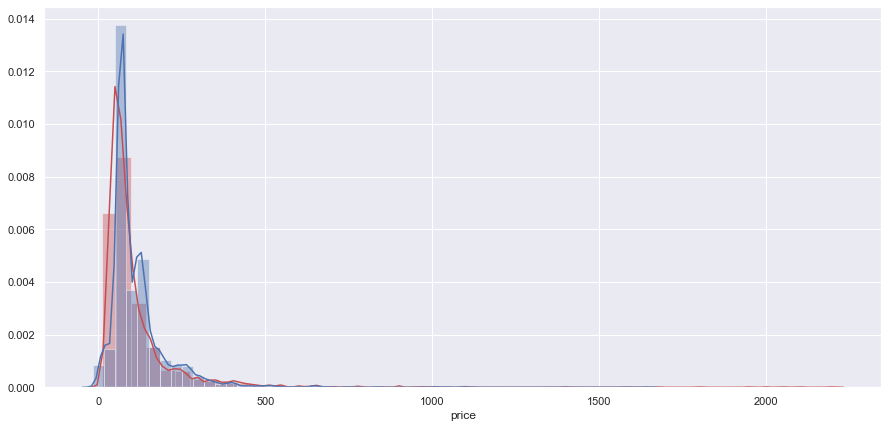

In [33]:
plt.figure(figsize=(15,7))
sns.distplot(y_test,color= 'r')
sns.distplot(prediction)
plt.show()

In [34]:
model.coef_,model.intercept_

(array([ 5.67570174e-01,  8.21846141e-02, -5.60973647e-03, -4.37367113e-01,
        -5.12187431e-03,  5.13900728e-02,  3.55094026e+01, -6.95879991e+00]),
 -37.32950717452755)

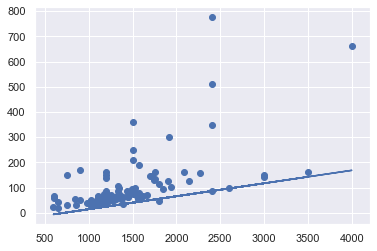

In [35]:
# Plot between first hundred "total area in sqft" and actual output
plt.plot(x_test['total_sqft'][:100],x_test['total_sqft'][:100]*model.coef_[5]+model.intercept_)
plt.scatter(x_test['total_sqft'][:100],y_test[:100])

In [36]:
x_train = x_train.drop('society',axis = 1)
x_test = x_test.drop('society', axis = 1)

In [37]:
model = LinearRegression()
model.fit(x_train,y_train)

prediction = model.predict(x_test)
np.sqrt(mean_squared_error(y_test,prediction))

108.36275451235097

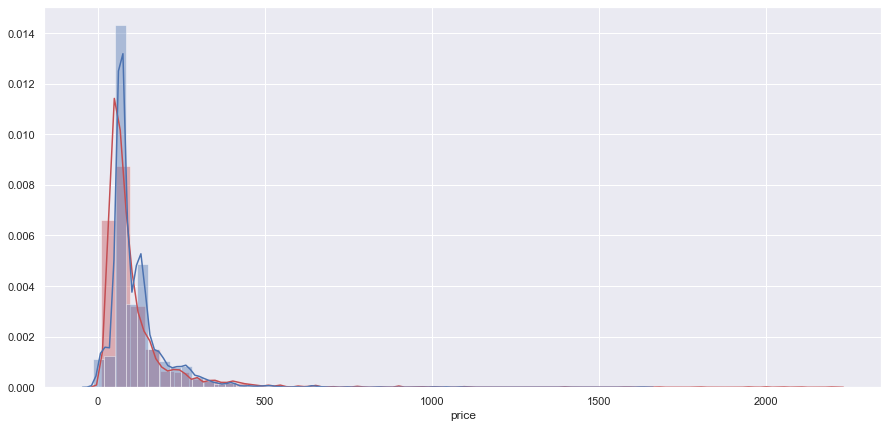

In [38]:
plt.figure(figsize=(15,7))
sns.distplot(y_test,color= 'r')
sns.distplot(prediction)
plt.show()

In [39]:
x_train = x_train.drop('total_sqft',axis = 1)
x_test = x_test.drop('total_sqft', axis = 1)

model = LinearRegression()
model.fit(x_train,y_train)

prediction = model.predict(x_test)
np.sqrt(mean_squared_error(y_test,prediction))

133.4147426061664